In [200]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [227]:
# reading dataset
data = pd.read_csv('/content/train_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [202]:
data.shape     # 614 records and 13 features

(614, 13)

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [204]:
# statistical description of the dataset
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [205]:
# no.of unique values in each features
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [206]:
# we could drop 'Load_ID'
data.drop(['Loan_ID'],axis=1,inplace=True)

In [207]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [208]:
# data type of each feature
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Handling Missing Values

In [209]:
# checking for missing values
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [210]:
# checking for mode of col 'Dependents'
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [211]:
#filling missing values in categorical cols with mode

data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

#filling missing values in numerical cols with median
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].median())

In [212]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- missing values handled

2. Outlier Detection And Handling

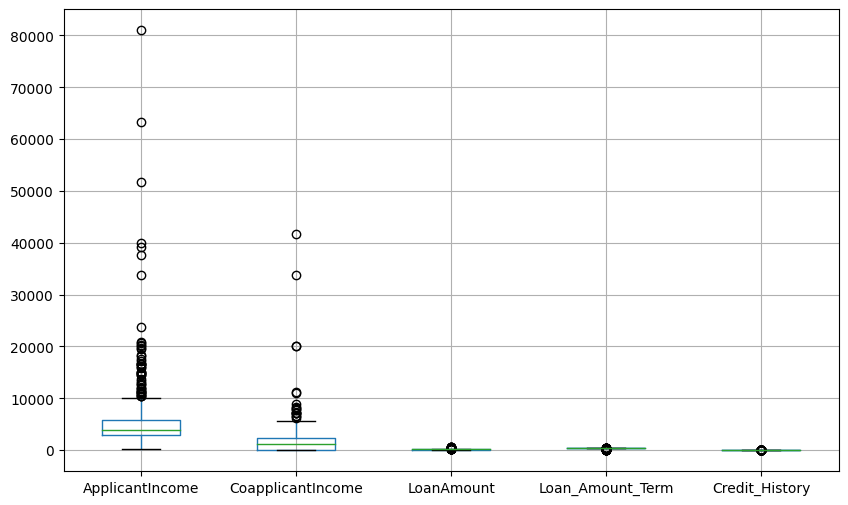

In [213]:
#Outlier Detection using boxplot
data.boxplot(figsize=(10,6))
plt.show()

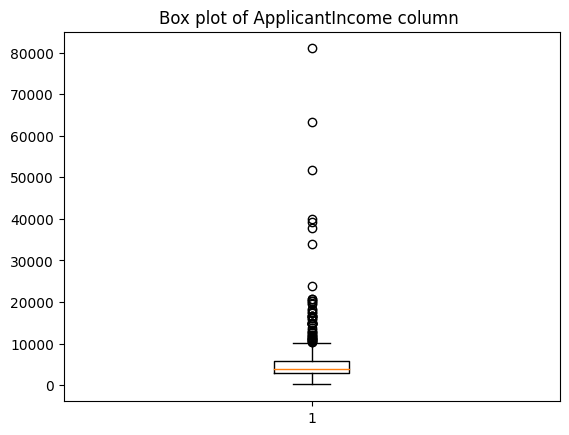

In [214]:
#outlier detection using boxplot of col 'ApplicantIncome'
plt.boxplot(data['ApplicantIncome'])
plt.title('Box plot of ApplicantIncome column ')
plt.show()

REMOVING OUTLIERS USING IQR METHOD

In [215]:
Q1 =data['ApplicantIncome'].quantile(.25)
Q2 =data['ApplicantIncome'].quantile(.5)
Q3 =data['ApplicantIncome'].quantile(.75)

In [216]:
IQR =Q3-Q1
upper=Q3 + (1.5*IQR)
lower =Q1-(1.5*IQR)
print(upper,lower)

10171.25 -1498.75


In [217]:
data[(data ['ApplicantIncome'] <lower) | (data['ApplicantIncome'] >upper)].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [218]:
#We are not dropping all outliers as it is too many. Instead we are just dropping outliers above 30000

In [219]:
#outlier indexes
out_index=np.where(data['ApplicantIncome']>30000)
print(out_index)

(array([155, 171, 183, 185, 333, 409, 443]),)


In [220]:
data.drop([155, 171, 183, 185, 333, 409, 443],inplace=True)

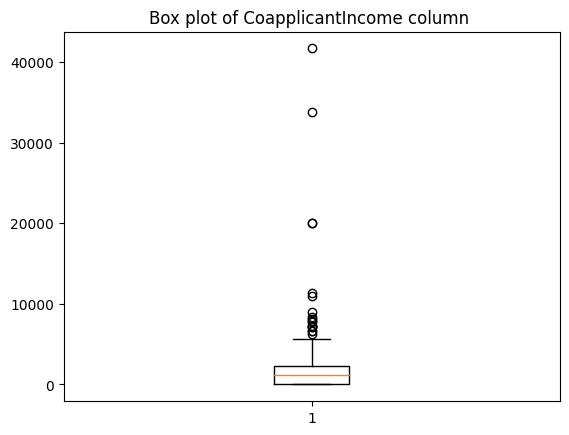

In [221]:
#outlier detection using boxplot of col 'CoapplicantIncome'
plt.boxplot(data['CoapplicantIncome'])
plt.title('Box plot of CoapplicantIncome column ')
plt.show()

REMOVING OUTLIERS USING IQR METHOD

In [222]:
Q1 =data['CoapplicantIncome'].quantile(.25)
Q2 =data['CoapplicantIncome'].quantile(.5)
Q3 =data['CoapplicantIncome'].quantile(.75)

In [223]:
IQR =Q3-Q1
upper=Q3 + (1.5*IQR)
lower =Q1-(1.5*IQR)
print(upper,lower)

5760.0 -3456.0


In [224]:
data[(data ['CoapplicantIncome'] <lower) | (data['CoapplicantIncome'] >upper)].index

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

In [225]:
data =data.drop([9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600], inplace = True)

3. Encoding

In [228]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [229]:
# using Label Encoding for ordinal features
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [230]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Splitting into independent and dependent features

In [234]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [239]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=143)

In [240]:
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((491, 12), (491,), (123, 12), (123,))

4. **SCALING**

In [243]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [244]:
data.loc[:,['Loan_Status']]= sc.fit_transform(data[['Loan_Status']])

In [245]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,6.140000e+02
mean,0.838762,0.657980,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,8.823922e-17
std,0.421752,0.484971,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,1.000815e+00
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,-1.482537e+00
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,-1.482537e+00
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,6.745193e-01
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,6.745193e-01
max,2.000000,2.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,6.745193e-01


In [246]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,0.674519
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,-1.482537
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,0.674519
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0.674519
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,0.674519
